In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
from models import *
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, ToTensor, Resize, Normalize

In [2]:
np.random.seed(83123)

In [3]:
dataset = CIFAR10(root='.', download=True, transform=Compose([Resize(32), ToTensor(), Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]))

Files already downloaded and verified


In [4]:
G = torch.load('cifar10_logan_b/G_25.pth').to('cuda').eval()
E = torch.load('cifar10_logan_b/Epost_1.pth').to('cuda').eval()

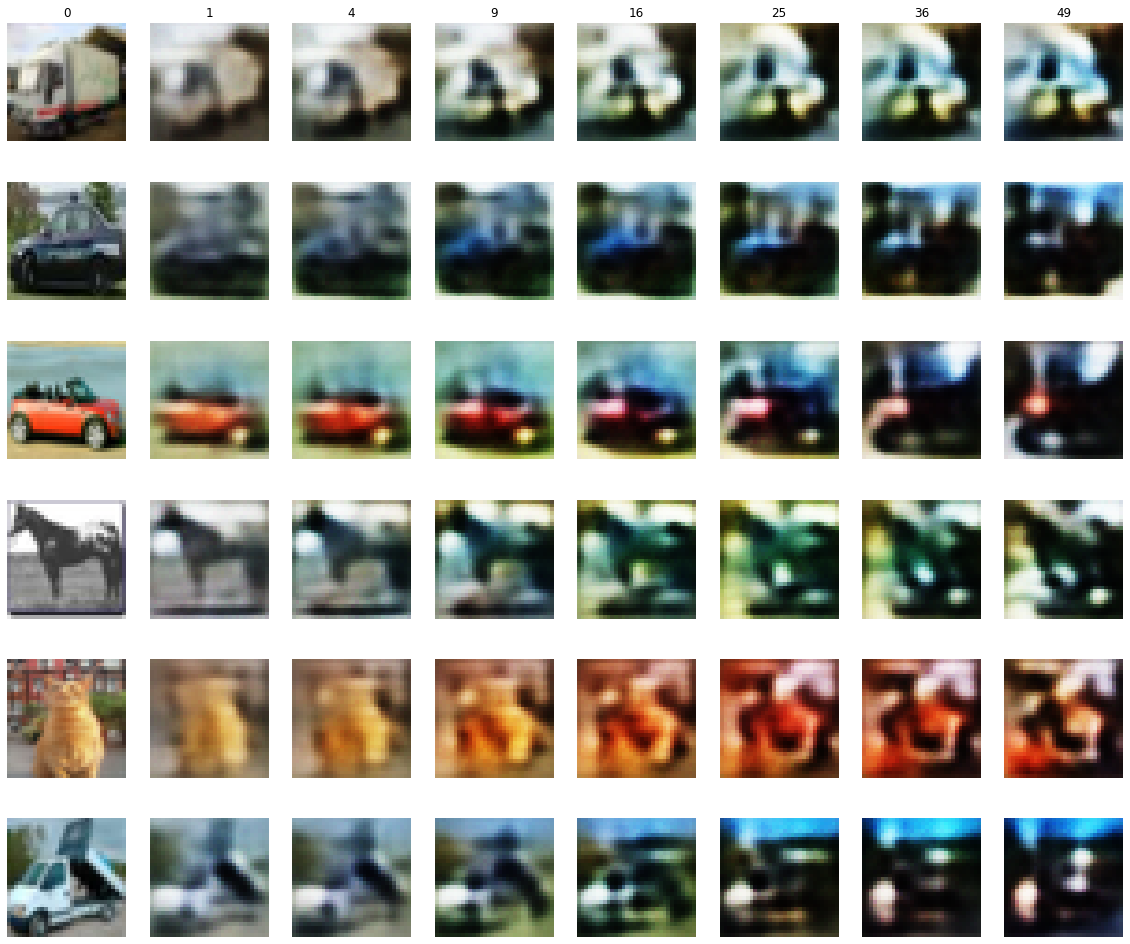

In [5]:
plt.gcf().set_size_inches(20, 20)
for r in range(1, 7):
    count = 0
    boot_image = dataset[np.random.randint(50000)][0].view(1, 3, 32, 32)
    plt.subplot(7, 8, 8*r + 1)
    plt.imshow((boot_image.cpu().detach().squeeze().numpy().transpose((1,2,0))+1)/2)
    if r == 1:
        plt.title(count)
    plt.axis('off')
    boot_latent = E(boot_image.to('cuda'))
    for t in range(1, 8):
        plt.subplot(7, 8, 8*r + t+1)
        for _ in range((t-1)*2 + 1):
            boot_image = G(boot_latent).detach()
            boot_latent = E(boot_image.to('cuda')).detach()
            count += 1
        plt.imshow((boot_image.cpu().detach().squeeze().numpy().transpose((1,2,0)) + 1)/2)
        if r == 1:
            plt.title(count)
        plt.axis('off')
plt.savefig(f'logan-b_bootstrap.png', dpi=120, transparent=True, bbox_inches='tight')
plt.show()